(a) Load the training set and test set using Pandas:

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [10]:
# Load training set
train_data = pd.read_csv(r'training_audit_data_-969965368.csv')

# Load test set
test_data = pd.read_csv(r'test_audit_data-1_-1393761500.csv')

(b) Plot two scatter plots of 'TOTAL' against 'Money Value':

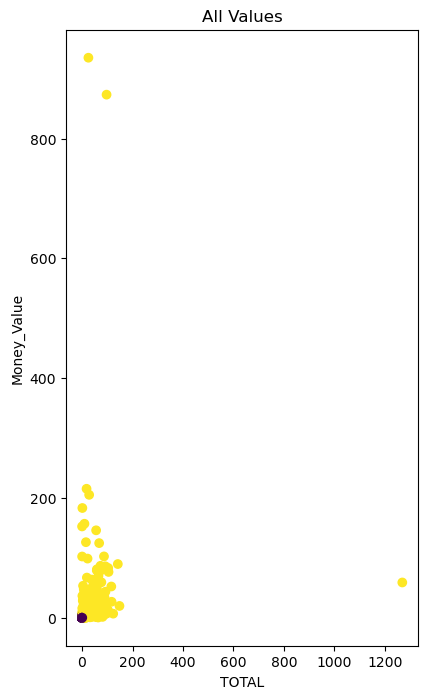

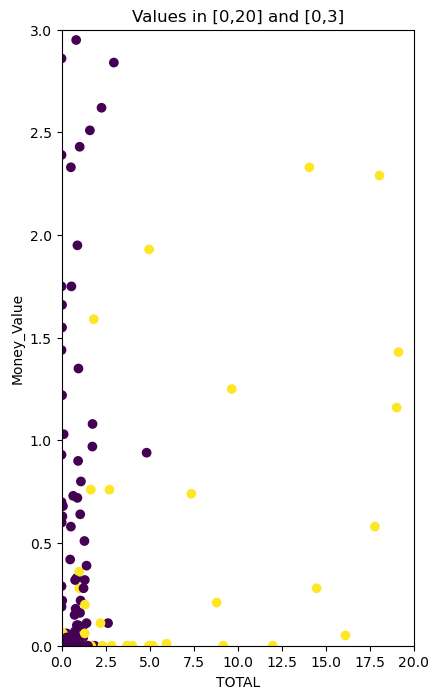

In [20]:

# Scatter plot of 'TOTAL' against 'Money Value' for all values
plt.figure(figsize=(10,8))
plt.subplot(121)
plt.scatter(train_data['TOTAL'], train_data['Money_Value'], c=train_data['Risk'])
plt.xlabel('TOTAL')
plt.ylabel('Money_Value')
plt.title('All Values')

# Scatter plot of 'TOTAL' against 'Money Value' for values in the range [0, 20] and [0, 3]
plt.figure(figsize=(10,8))
plt.subplot(122)
plt.scatter(train_data['TOTAL'], train_data['Money_Value'], c=train_data['Risk'])
plt.xlabel('TOTAL')
plt.ylabel('Money_Value')
plt.title('Values in [0,20] and [0,3]')
plt.xlim(0, 20)
plt.ylim(0, 3)

plt.show()


(c) Normalise the training set and the test set using StandardScaler() (Hint: the parameters should come from the training set only) (2 marks).

In [25]:


# Extract features for scaling
train_features = train_data.iloc[:, :-1].values
test_features = test_data.iloc[:, :-1].values

# Create scaler object and fit on training data only
scaler = StandardScaler()
scaler.fit(train_features)

# Transform both training and test features using the scaler
train_features_scaled = scaler.transform(train_features)
test_features_scaled = scaler.transform(test_features)

# Combine the scaled features with their respective classes
train_data_scaled = pd.DataFrame(data=train_features_scaled, columns=train_data.columns[:-1])
train_data_scaled['Risk'] = train_data['Risk'].values

test_data_scaled = pd.DataFrame(data=test_features_scaled, columns=test_data.columns[:-1])
test_data_scaled['Risk'] = test_data['Risk'].values


(d) Perform a PCA analysis on the scaled training set and plot the scree plot to report
variances captured by each principal component (3 marks).

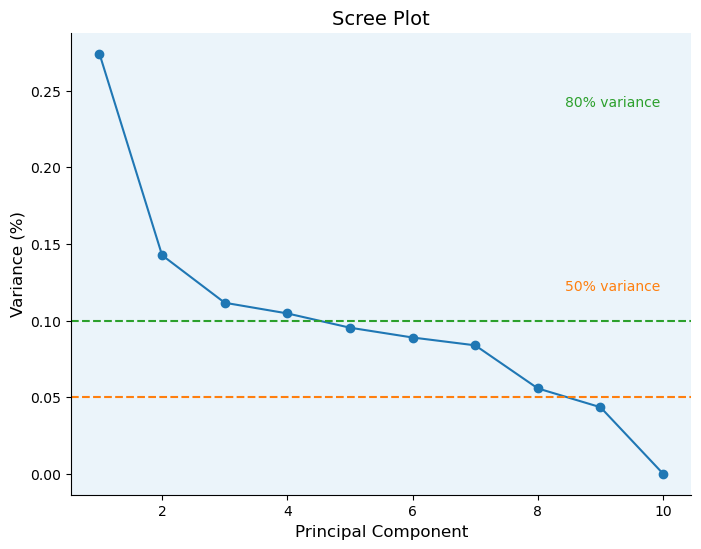

In [44]:
# Extract features for PCA
train_features_scaled = train_data_scaled.iloc[:, :-1].values

# Create PCA object and fit on training data
pca = PCA()
pca.fit(train_features_scaled)

# Set up plot
fig, ax = plt.subplots(figsize=(8, 6))

# Plot scree plot of variances captured by each principal component
ax.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', color='#1f77b4')
ax.axhline(y=0.05, color='#ff7f0e', linestyle='--')
ax.axhline(y=0.1, color='#2ca02c', linestyle='--')

# Set chart properties
ax.set_xlabel('Principal Component', fontsize=12)
ax.set_ylabel('Variance (%)', fontsize=12)
ax.set_title('Scree Plot', fontsize=14)
ax.set_facecolor('#EBF4FA')
ax.tick_params(axis='both', which='major', labelsize=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Add text annotations
ax.text(0.95, 0.45, '50% variance', transform=ax.transAxes, ha='right', va='center', color='#ff7f0e', fontsize=10)
ax.text(0.95, 0.85, '80% variance', transform=ax.transAxes, ha='right', va='center', color='#2ca02c', fontsize=10)

# Show plot
plt.show()


(e) Plot projections of the training set (I) in the projection space constructed using the first
principal component (PC1) and the second principal component (PC2) obtained from
the training set (I). You need to label the data using different colours in the picture
according to its class and set the label for the x-axis and y-axis, separately (2 marks).

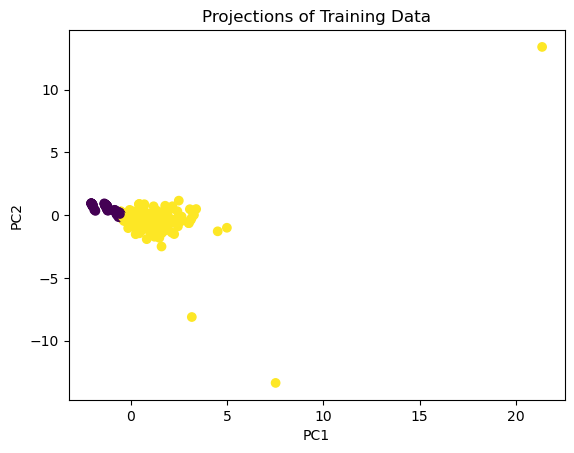

In [28]:
# Extract features for plotting
train_features_scaled = train_data_scaled.iloc[:, :-1].values
train_classes = train_data_scaled['Risk'].values

# Project data onto PC1 and PC2
pca = PCA(n_components=2)
train_proj = pca.fit_transform(train_features_scaled)

# Plot the projections
plt.scatter(train_proj[:, 0], train_proj[:, 1], c=train_classes)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Projections of Training Data')
plt.show()


(f) Obtain projections of the test set by projecting the scaled test data on the same PCA
space produced by the training set in Task 1 (d) (1 mark).

In [31]:
# Extract features for projecting
test_features_scaled = test_data_scaled.iloc[:, :-1].values

# Project test set onto PC
test_features_scaled

array([[ 1.88061   , -0.92024238, -0.0859729 , ..., -0.27752894,
        -0.16151873, -2.16623577],
       [-0.6102316 ,  2.54943353, -0.48470456, ..., -0.27752894,
        -0.16151873, -0.09533556],
       [ 1.88061   ,  0.20505792, -0.23888455, ..., -0.27752894,
        -0.16151873, -2.16623577],
       ...,
       [-0.58612069, -0.6389173 , -0.19630156, ..., -0.27752894,
        -0.16151873, -2.16623577],
       [ 1.88061   , -0.73269233, -0.4556707 , ..., -0.27752894,
        -0.16151873, -2.16623577],
       [ 0.30598266,  0.01750787, -0.38018267, ..., -0.27752894,
        -0.16151873, -0.09533556]])

2. Task 2 (3 marks)


(a) Divide the training dataset into a smaller training set (II) and a validation set using
the train test split function and report the number of points in each set. Usually, we
use 20%-30% of the total data points in the whole training set as the validation data.
It is your choice on how to set the exact ratio (2 marks).

In [35]:
# Splitting the dataset into features and target variable
X = train_data.drop('Risk', axis=1)
y = train_data['Risk']

# Splitting the dataset into training set II (80%) and validation set (20%)
X_train_data, X_val, y_train_data, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Reporting the number of points in each set
print("Number of points in training set II: ", len(X_train_data))
print("Number of points in validation set: ", len(X_val))


Number of points in training set II:  312
Number of points in validation set:  79


(b) Normalise both the training set (II) and the validation set (Hint: the parameters should
come from the training set (II) only)(1 mark).


In [38]:
# Normalizing the training set II
scaler = StandardScaler()
X_train_norm = scaler.fit_transform(X_train_data)

# Normalizing the validation set using the same scaler parameters
X_val_norm = scaler.transform(X_val)

X_val_norm


array([[-0.56747816, -1.10780337, -0.51023299, -0.27108324, -0.30379252,
        -0.30304101, -0.25470105, -0.29571495, -0.18141497, -0.11467993],
       [-0.51359892, -0.19511615,  0.73446784,  0.14850584,  0.19903136,
        -0.30304101, -0.23584824, -0.29571495, -0.18141497, -0.11467993],
       [-0.51359892, -0.46892231, -0.51023299, -0.27002634, -0.30275066,
        -0.30304101, -0.24592029, -0.29571495, -0.18141497, -0.11467993],
       [-0.51359892, -1.01653464, -0.51023299, -0.2654024 , -0.29819256,
        -0.30304101, -0.25470105, -0.29571495, -0.18141497, -0.11467993],
       [-0.58359588, -1.01653464, -0.48479385, -0.27002634, -0.30092742,
        -0.30304101, -0.25470105, -0.29571495, -0.18141497, -0.11467993],
       [-0.56747816, -0.37765359,  0.11302596, -0.25087004, -0.23919769,
        -0.30304101, -0.25470105, -0.29571495, -0.18141497, -0.11467993],
       [-0.51359892, -0.37765359, -0.51023299, -0.2706869 , -0.30340182,
        -0.30304101, -0.25392628, -0.29571495